<a href="https://colab.research.google.com/github/HongTorxh/Study_Paran/blob/main/tensorflow_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets

In [2]:
input_shape = (28,28,1)
num_classes = 10
learning_rate = 0.001

In [3]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [5]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate), 
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
(train_x, train_y), (test_x,test_y) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

In [11]:
num_epochs = 1
batch_size = 64

In [9]:
hist = model.fit(train_x, train_y,
                 batch_size = batch_size,
                 shuffle=True)

938/938 [==============================] - 189s 201ms/step - loss: 0.2094 - accuracy: 0.9325


In [12]:
hist.history

{'loss': [0.20935393869876862], 'accuracy': [0.9325166940689087]}

In [13]:
model.evaluate(test_x, test_y, batch_size = batch_size)

157/157 [==============================] - 7s 47ms/step - loss: 0.0402 - accuracy: 0.9885


[0.040225446224212646, 0.9884999990463257]

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
test_image = test_x[0,:,:,0]
test_image.shape

(28, 28)

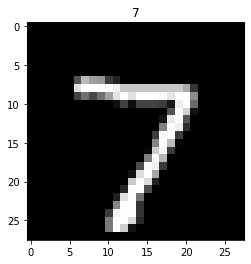

In [17]:
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

In [18]:
pred = model.predict(test_image.reshape(1,28,28,1))

In [19]:
pred.shape

(1, 10)

In [20]:
pred

array([[3.8839073e-07, 1.2791246e-06, 1.1462025e-05, 4.4110740e-05,
        3.0068303e-08, 1.1409522e-07, 4.6419070e-11, 9.9993265e-01,
        2.4799456e-06, 7.4290215e-06]], dtype=float32)

In [21]:
np.argmax(pred)

7

In [26]:
test_batch = test_x[:32]

In [27]:
test_batch.shape

(32, 28, 28, 1)

In [28]:
preds = model.predict(test_batch)

In [29]:
preds.shape

(32, 10)

In [30]:
np.argmax(preds).shape
np.argmax(preds, -1).shape
np.argmax(preds, -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])

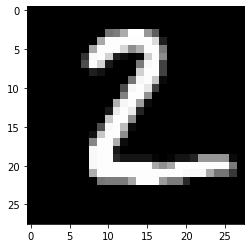

In [31]:
plt.imshow(test_batch[1,:,:,0], 'gray')
plt.show()